In [80]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import zipfile

In [13]:
unzipped = zipfile.ZipFile('/content/covertype.zip')
unzipped.extractall()

In [20]:
# Convert the gzipped data to a CSV file
df = pd.read_csv('/content/covtype.data.gz', compression='gzip', header=None)
df.to_csv('covtype.csv', index=False)

In [21]:
df = pd.read_csv('/content/covtype.csv')

In [22]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [23]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [24]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

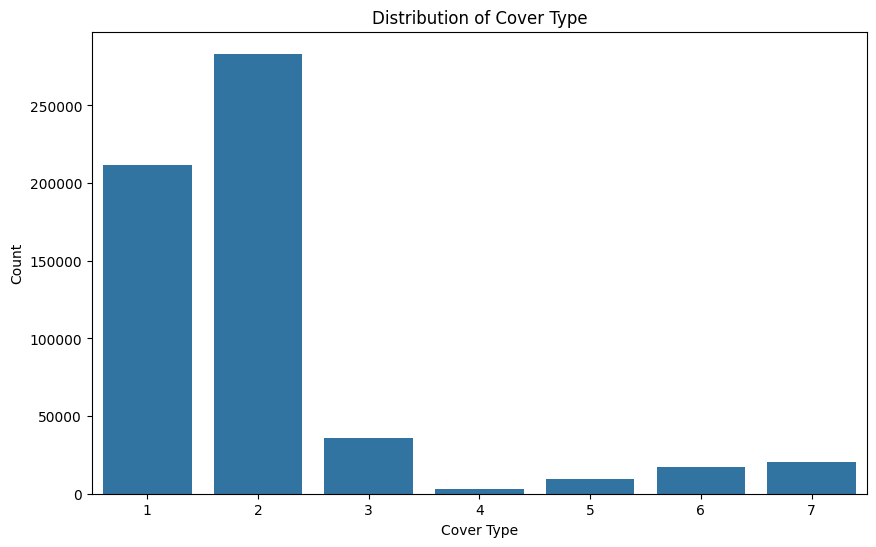

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df.iloc[:, 54])
plt.title('Distribution of Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

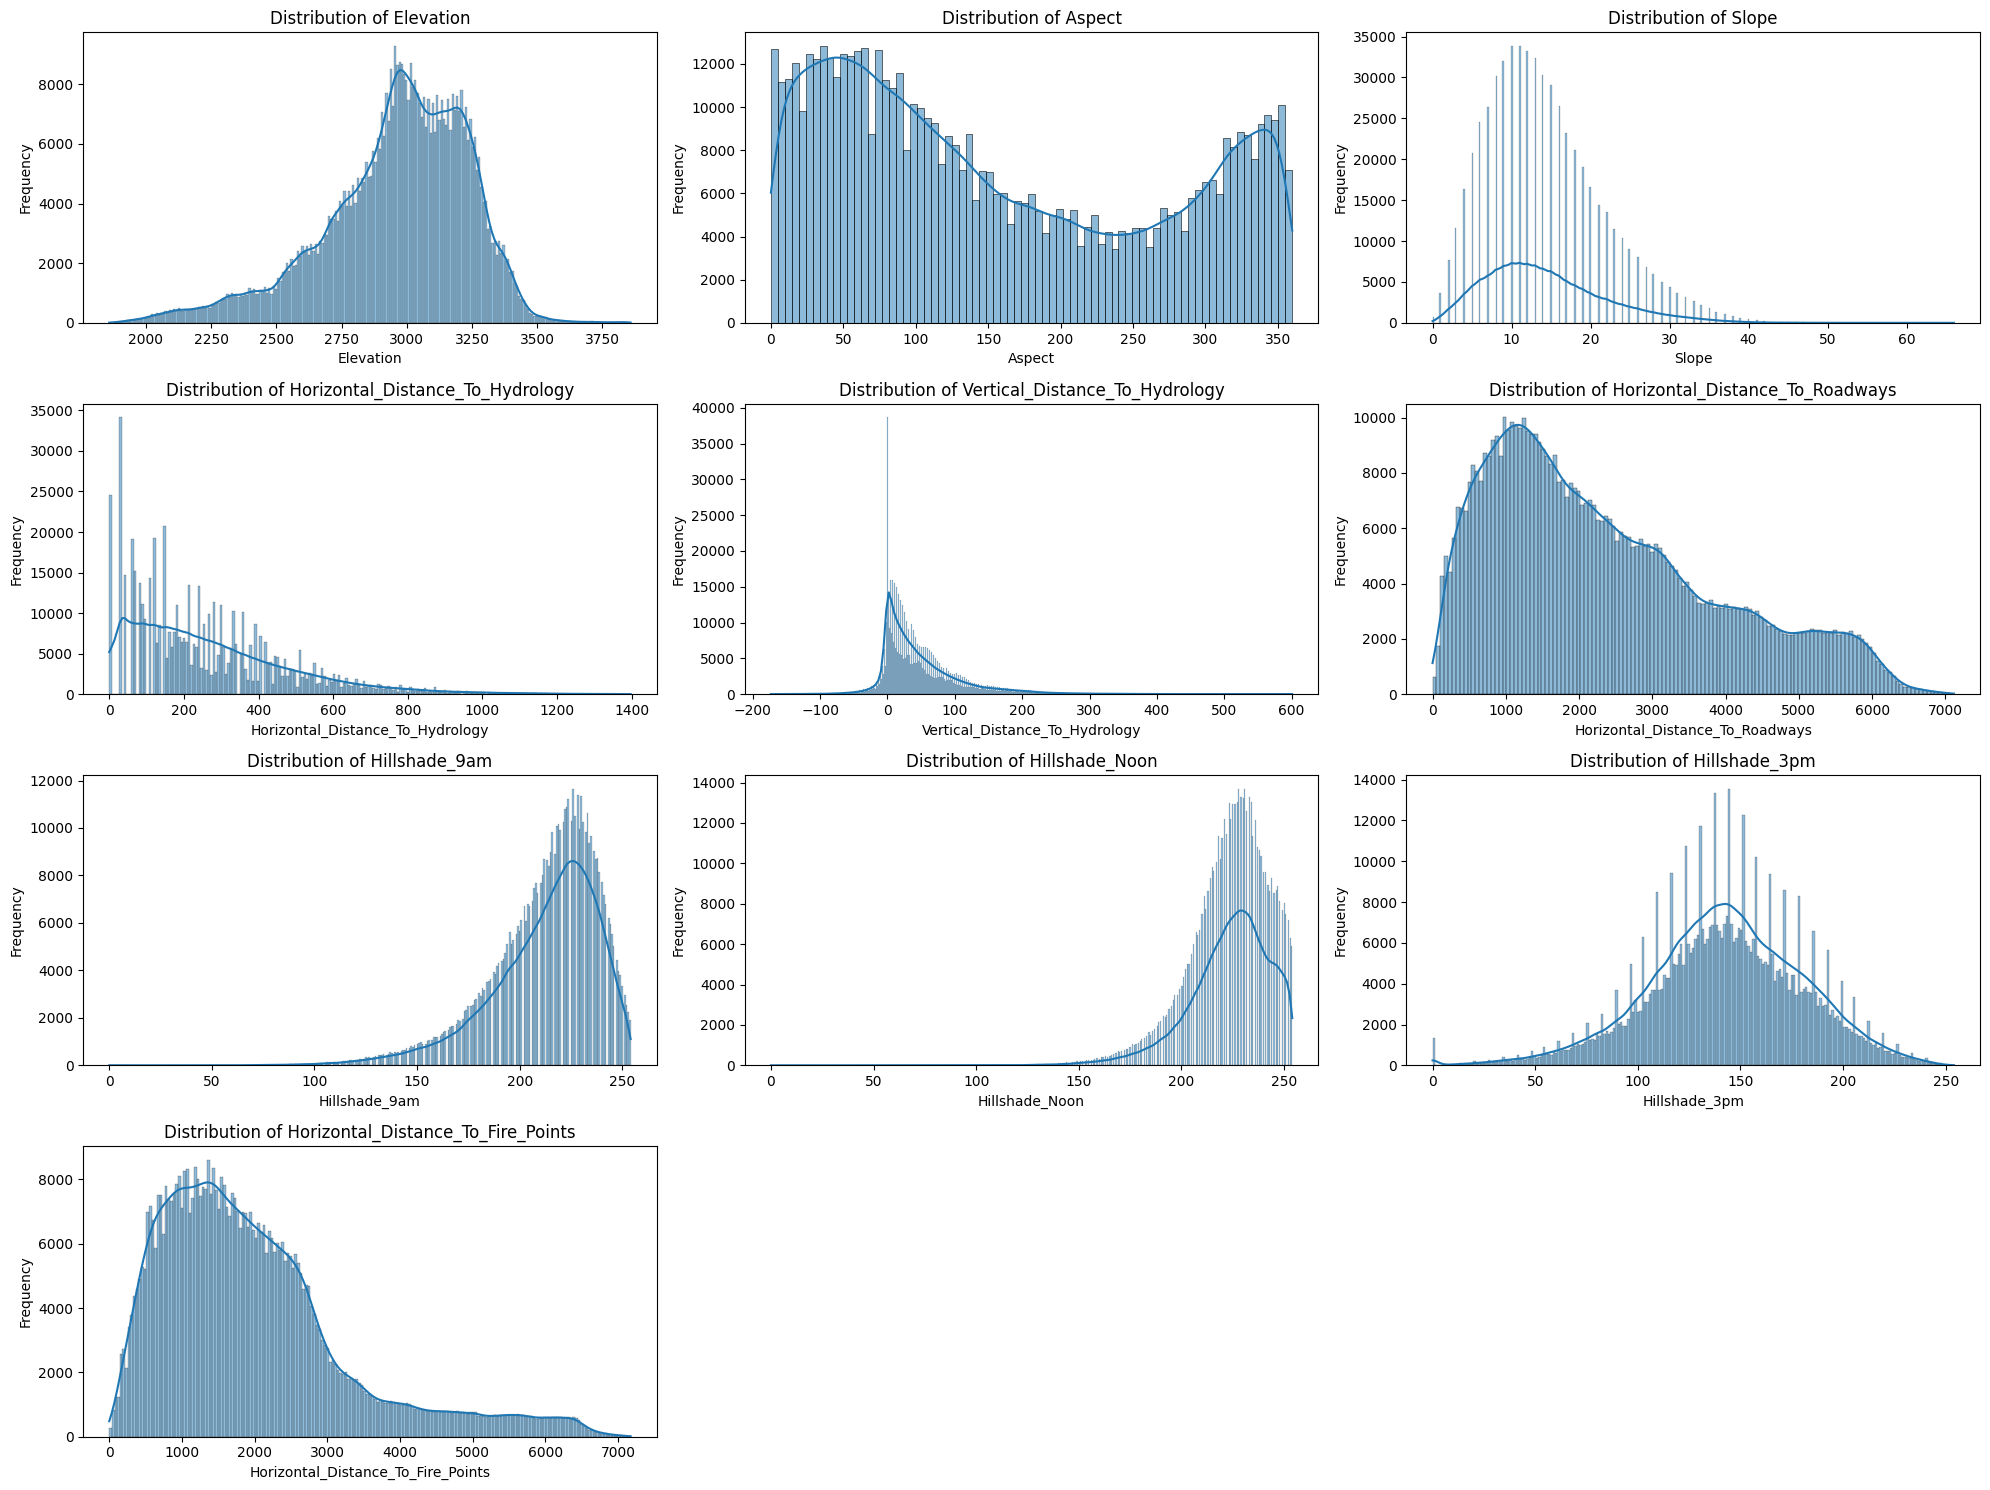

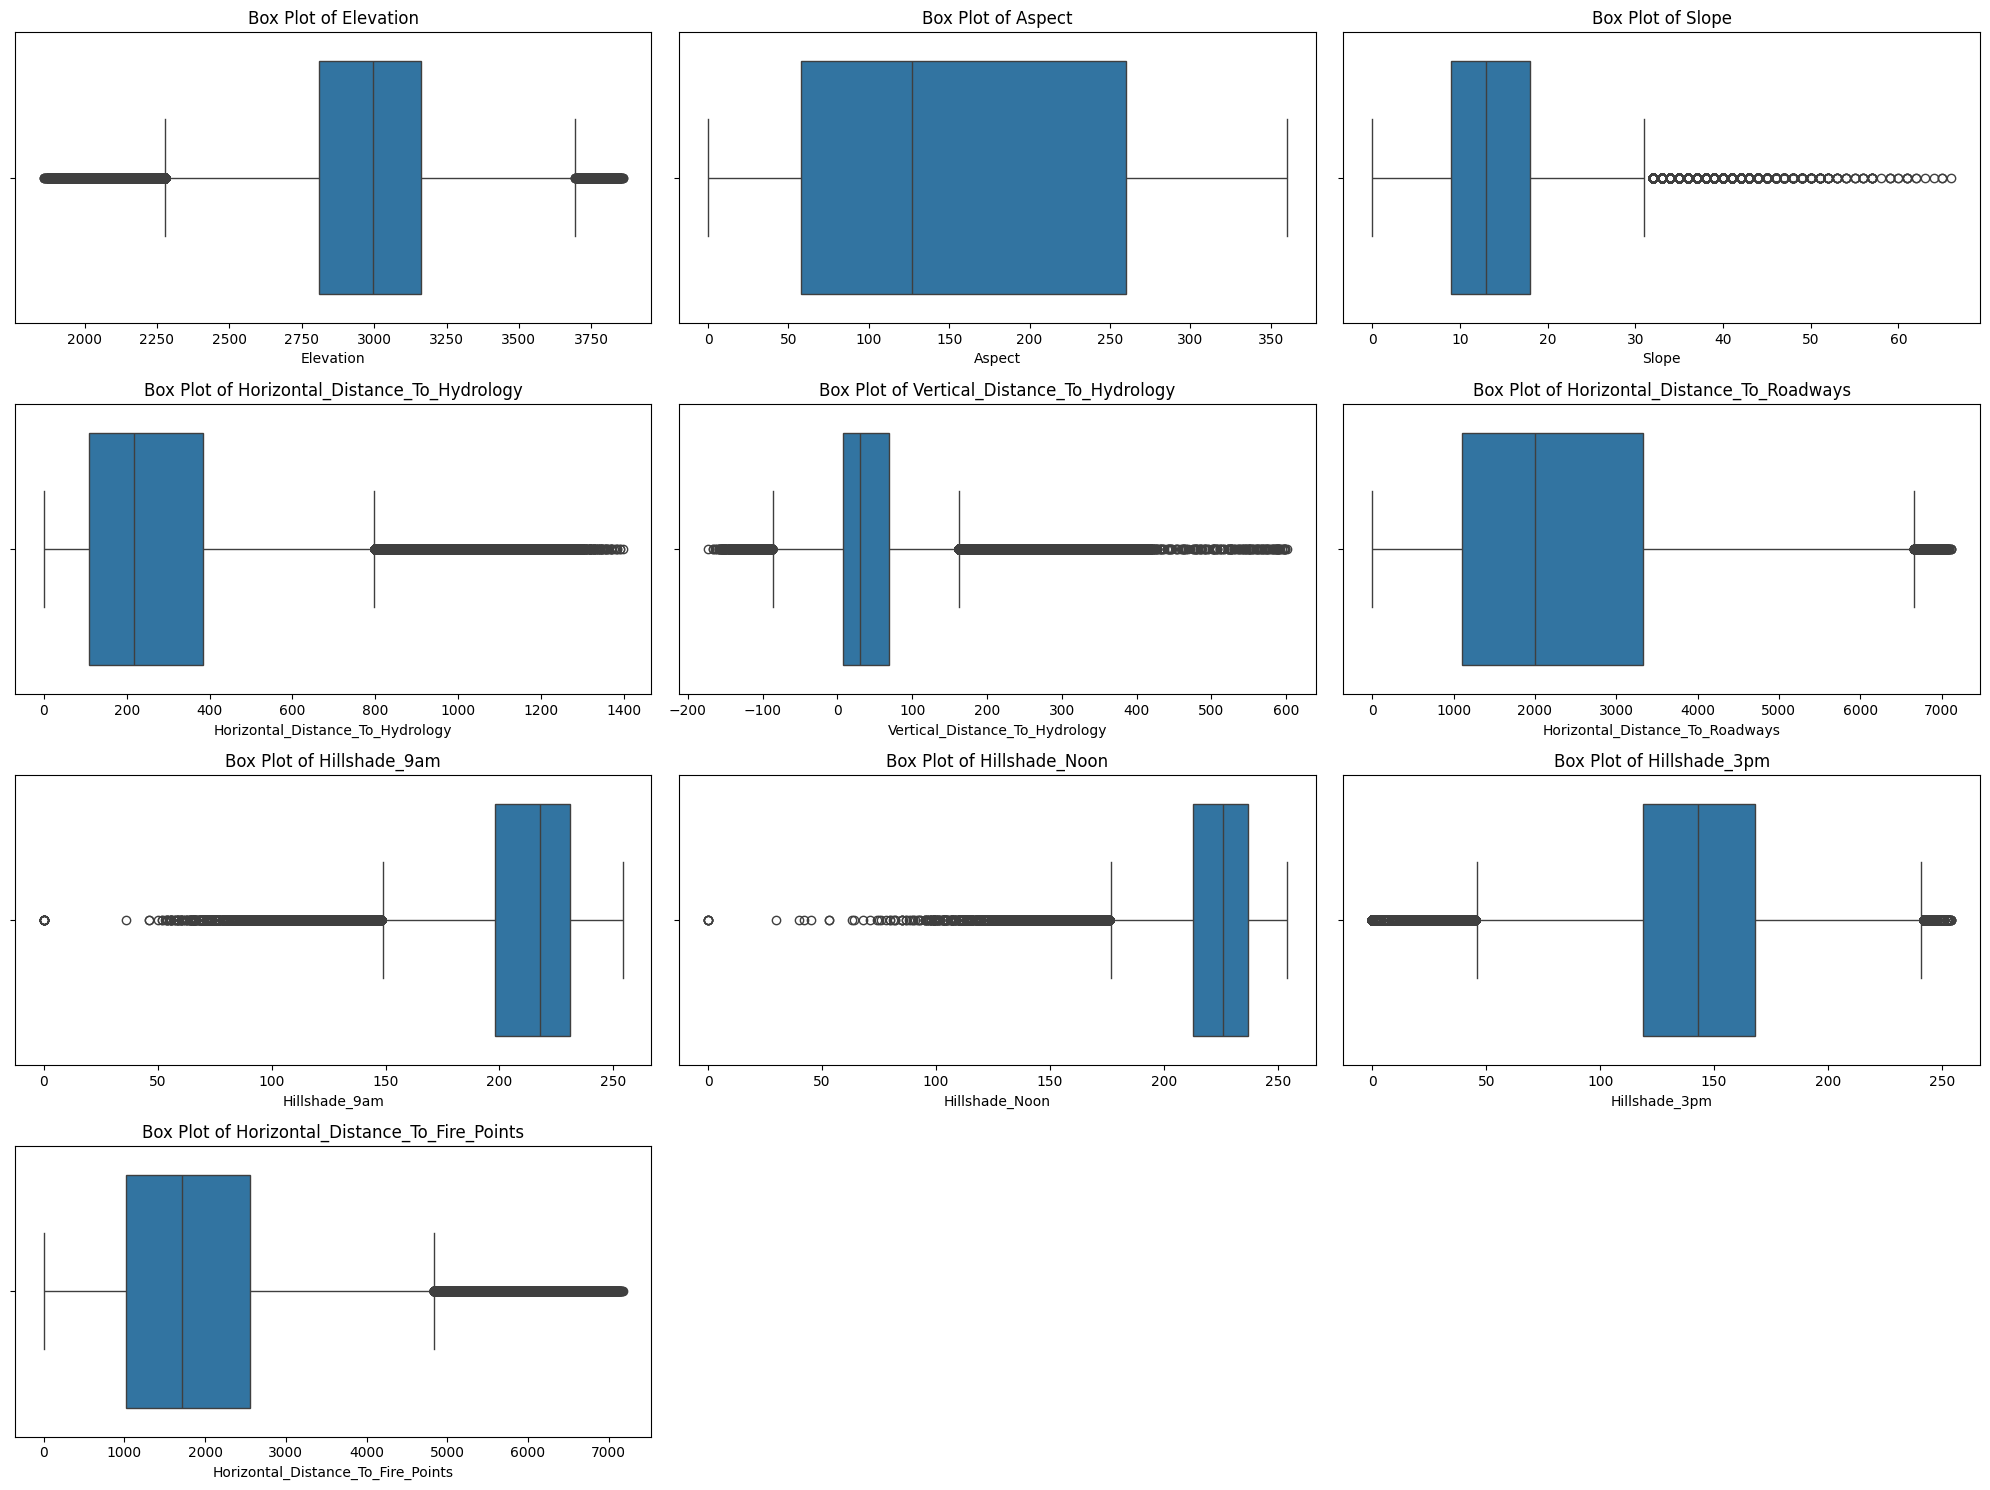

In [39]:
numerical_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # Based on description, these are numerical features
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                 'Horizontal_Distance_To_Fire_Points']

# Create histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df.iloc[:, col], kde=True)
    plt.title(f'Distribution of {feature_names[i]}')
    plt.xlabel(feature_names[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df.iloc[:, col])
    plt.title(f'Box Plot of {feature_names[i]}')
    plt.xlabel(feature_names[i])
plt.tight_layout()
plt.show()

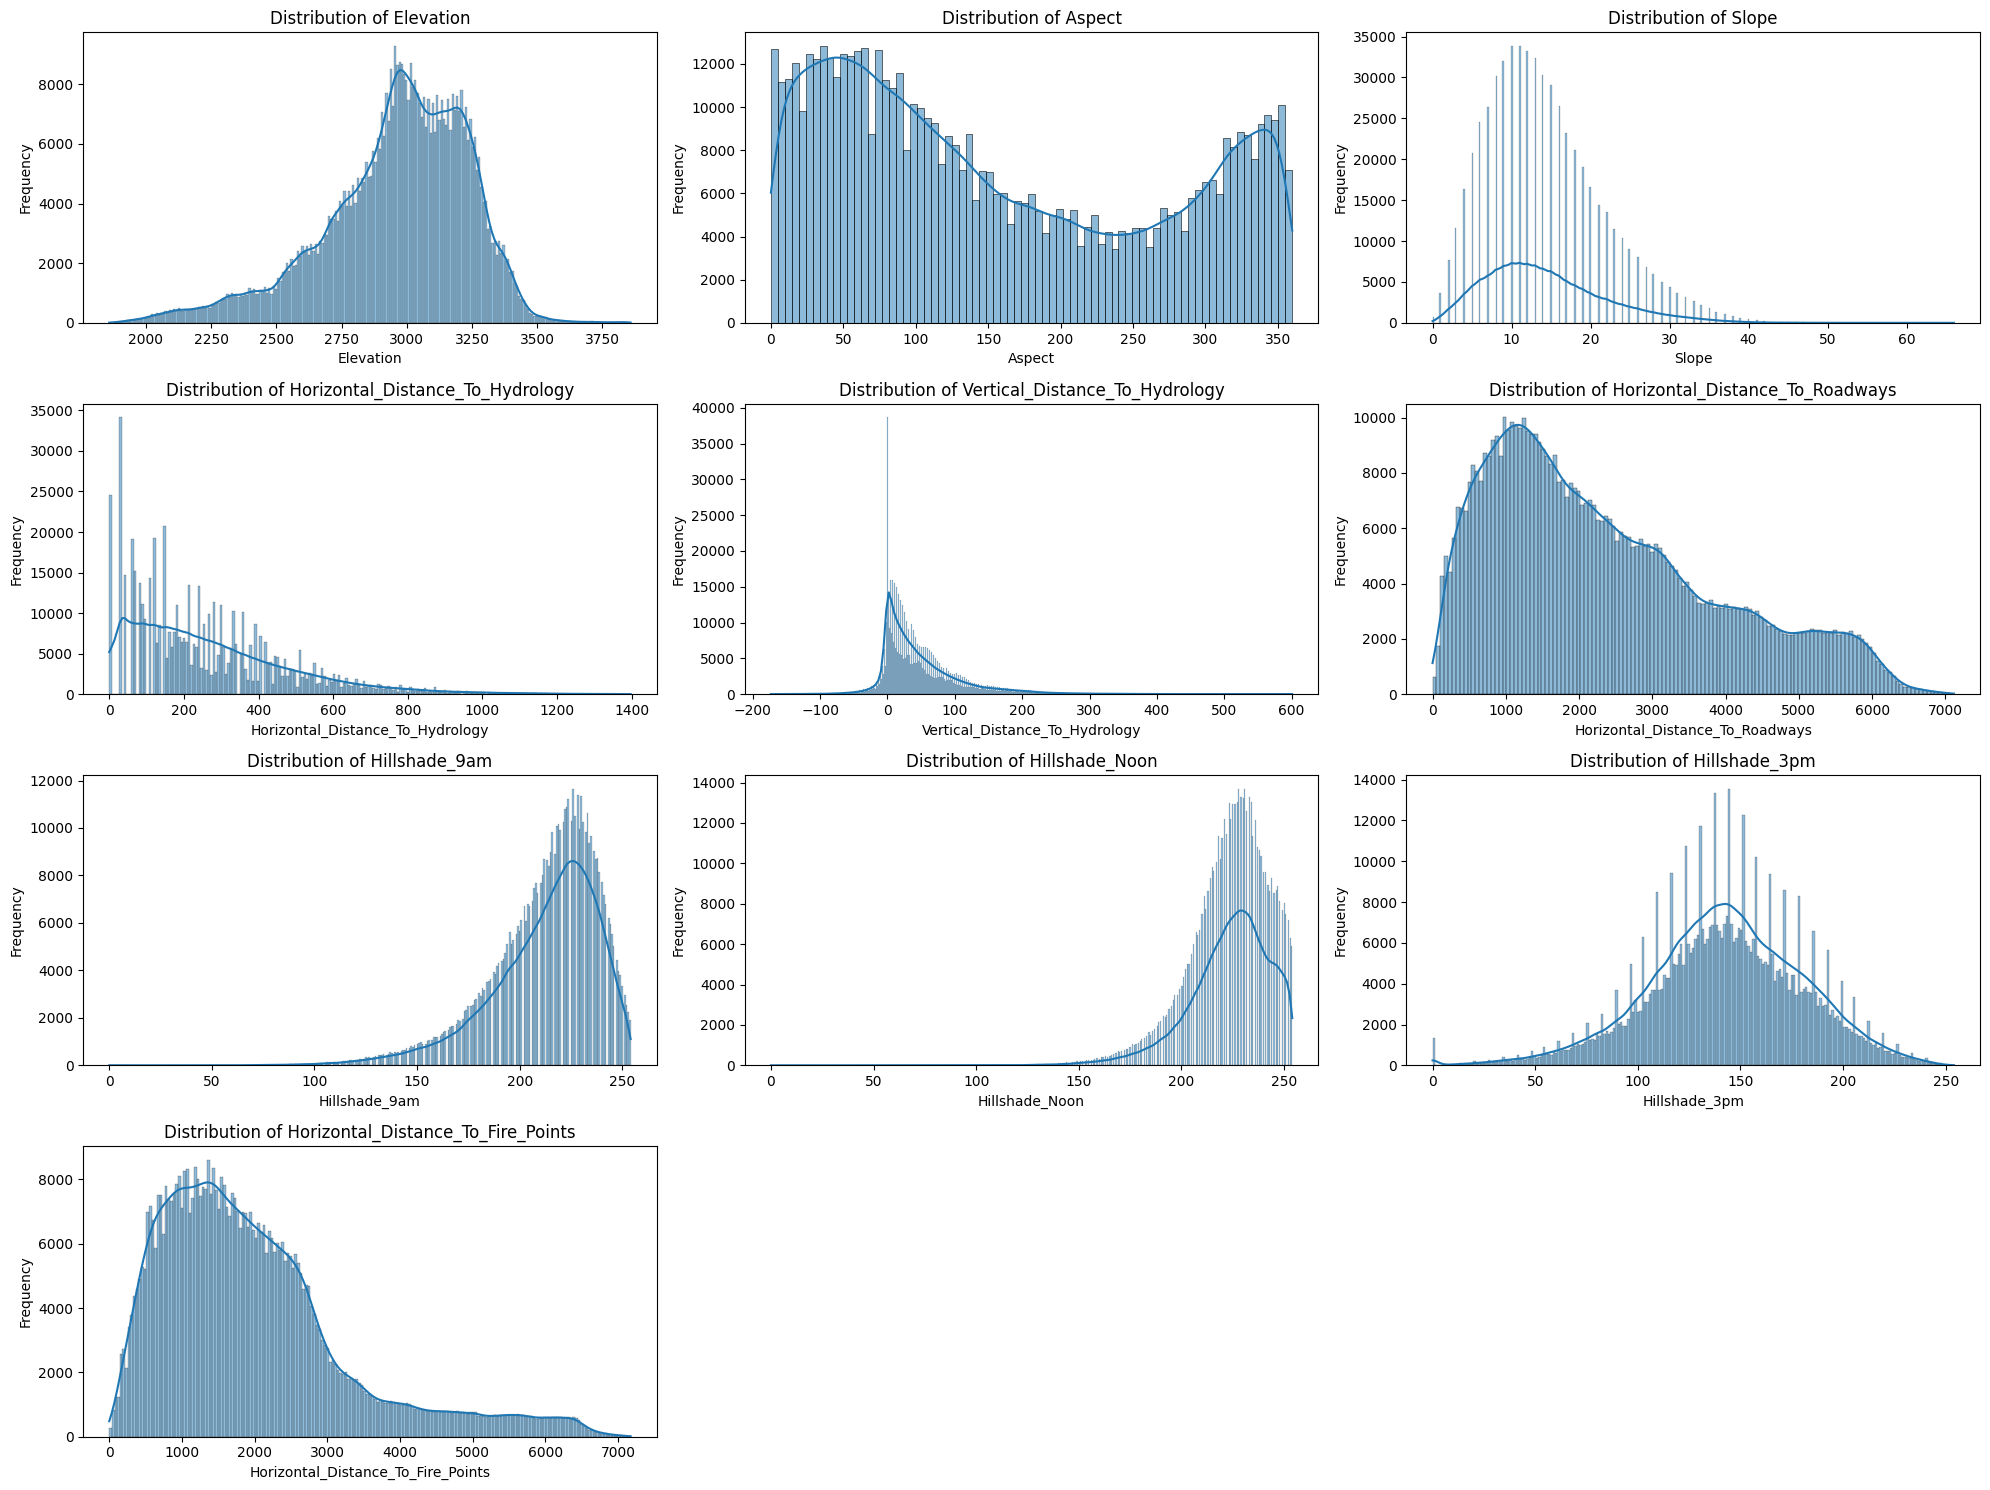

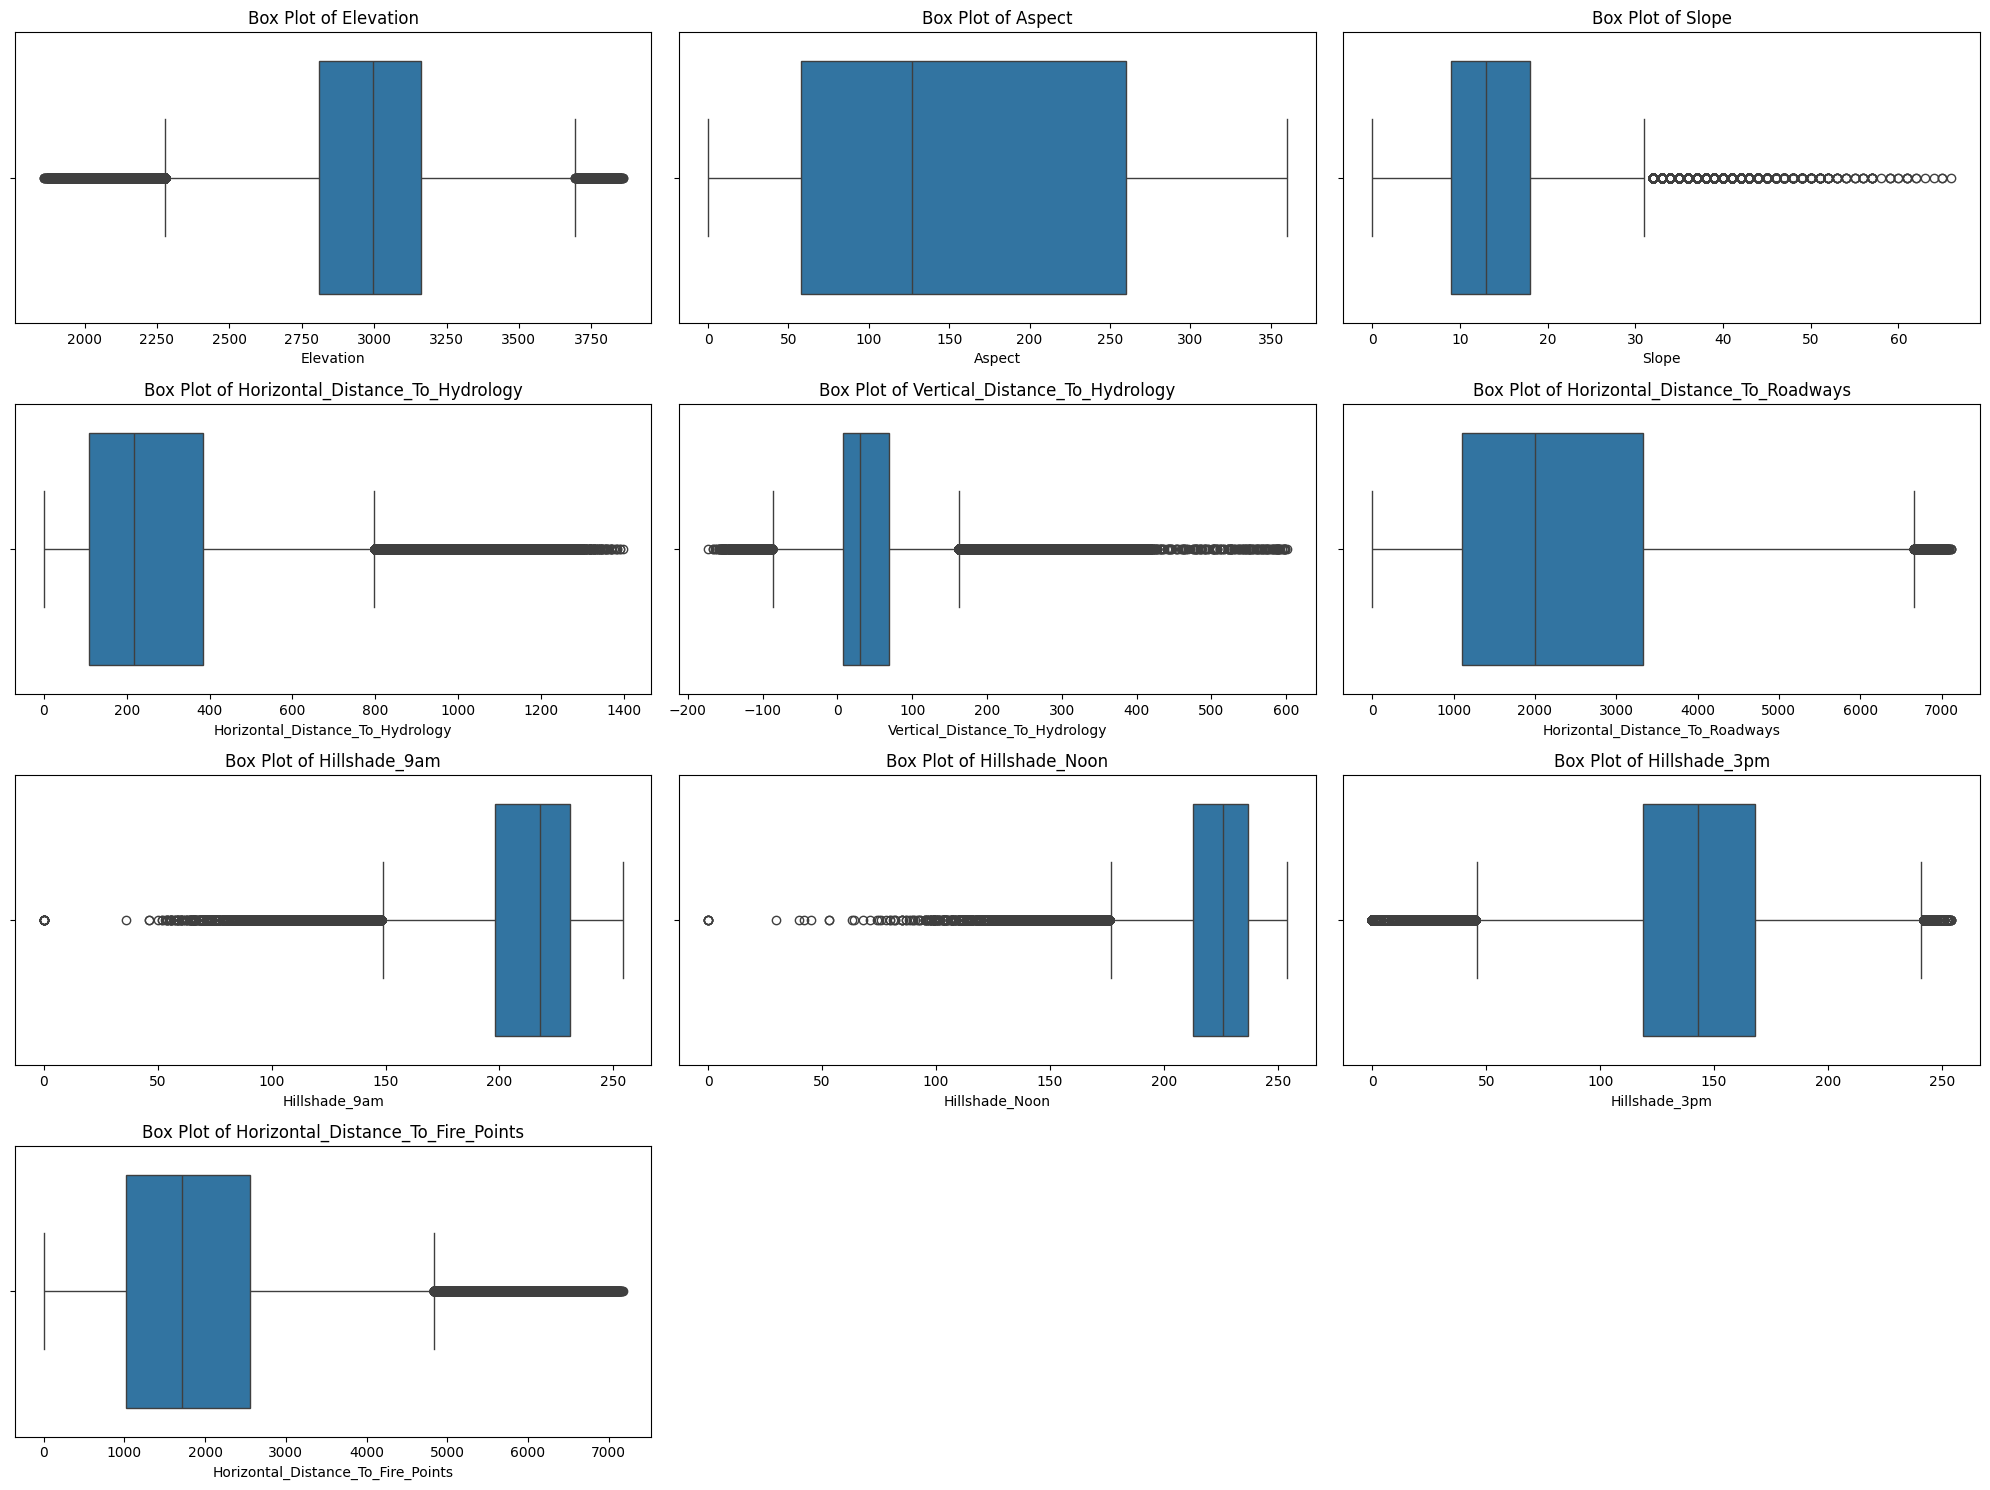

In [32]:
numerical_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # Based on description, these are numerical features
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                 'Horizontal_Distance_To_Fire_Points']

# Create histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df.iloc[:, col], kde=True)
    plt.title(f'Distribution of {feature_names[i]}')
    plt.xlabel(feature_names[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df.iloc[:, col])
    plt.title(f'Box Plot of {feature_names[i]}')
    plt.xlabel(feature_names[i])
plt.tight_layout()
plt.show()

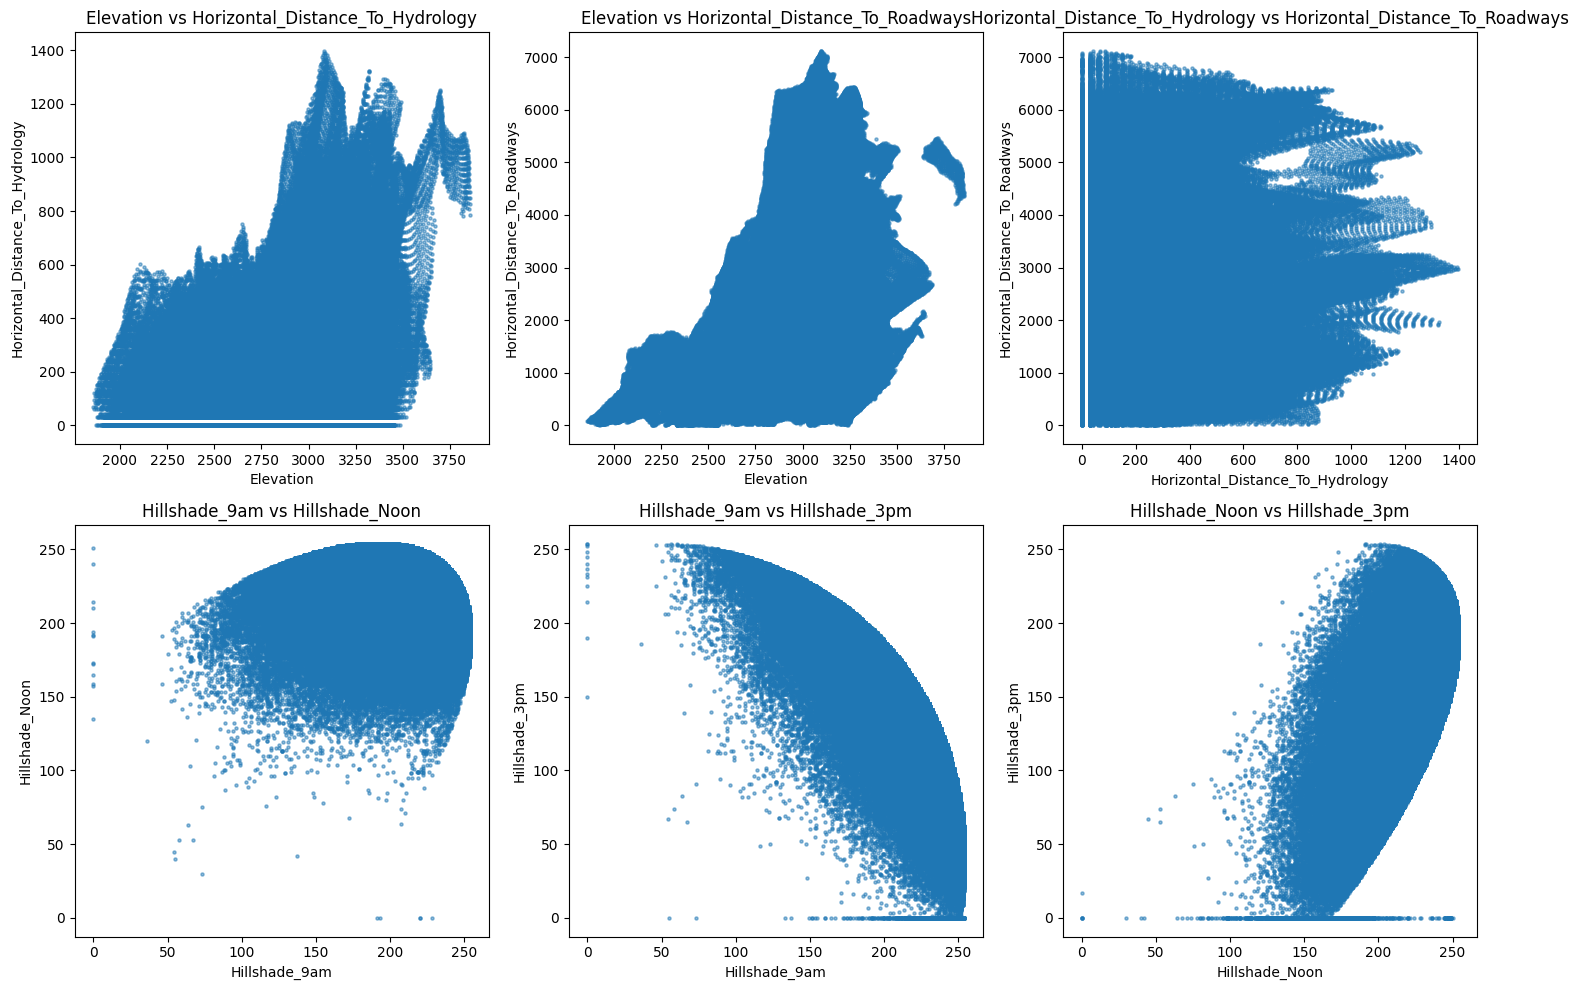

In [33]:
# Select a few pairs of numerical features for scatter plots
selected_pairs = [(0, 3), (0, 5), (3, 5), (6, 7), (6, 8), (7, 8)]
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                 'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(15, 10))
for i, (col1, col2) in enumerate(selected_pairs):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df.iloc[:, col1], df.iloc[:, col2], alpha=0.5, s=5)
    plt.title(f'{feature_names[col1]} vs {feature_names[col2]}')
    plt.xlabel(feature_names[col1])
    plt.ylabel(feature_names[col2])

plt.tight_layout()
plt.show()

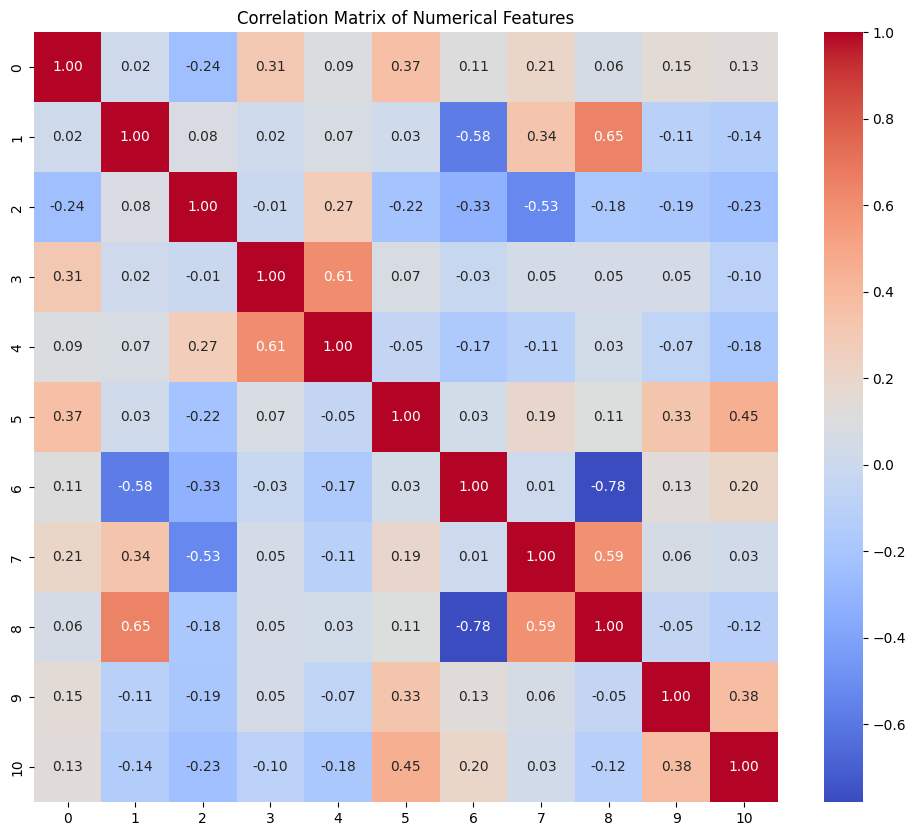

In [37]:
numerical_cols = df.iloc[:, :11]
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [46]:
# XGBoost
xxgb = df.iloc[:, :54]
yxgb = df.iloc[:, 54]

x_train, x_test, y_train, y_test = train_test_split(xxgb, yxgb, test_size=0.2, random_state=42)

# Adjust target variable labels to be zero-indexed
y_train = y_train - 1
y_test = y_test - 1

In [47]:
xgbmodel = XGBClassifier()
xgbmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
xgby_pred = xgbmodel.predict(x_test)

accuracy = accuracy_score(y_test, xgby_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8711823274786366


In [59]:
report = classification_report(y_test, xgby_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
           4       0.89      0.59      0.71      1995
           5       0.85      0.82      0.83      3489
           6       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



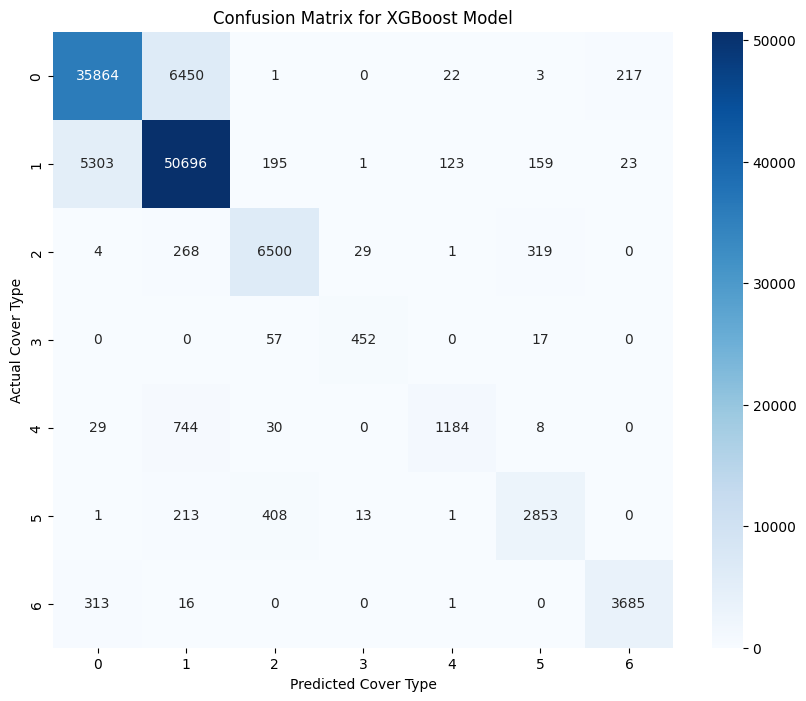

In [74]:
# Visualize the confusion matrix
xgbcm = confusion_matrix(y_test, xgby_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(xgbcm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Cover Type')
plt.ylabel('Actual Cover Type')
plt.show()

In [52]:
# Randomforest
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
rfy_pred = rfmodel.predict(x_test)

rfaccuracy = accuracy_score(y_test, rfy_pred)
print(f'Accuracy: {rfaccuracy}')

Accuracy: 0.9552249081349019


In [56]:
rfreport = classification_report(y_test, rfy_pred)
print(rfreport)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.96      7121
           3       0.92      0.83      0.87       526
           4       0.94      0.77      0.85      1995
           5       0.94      0.90      0.92      3489
           6       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.96      0.96      0.95    116203



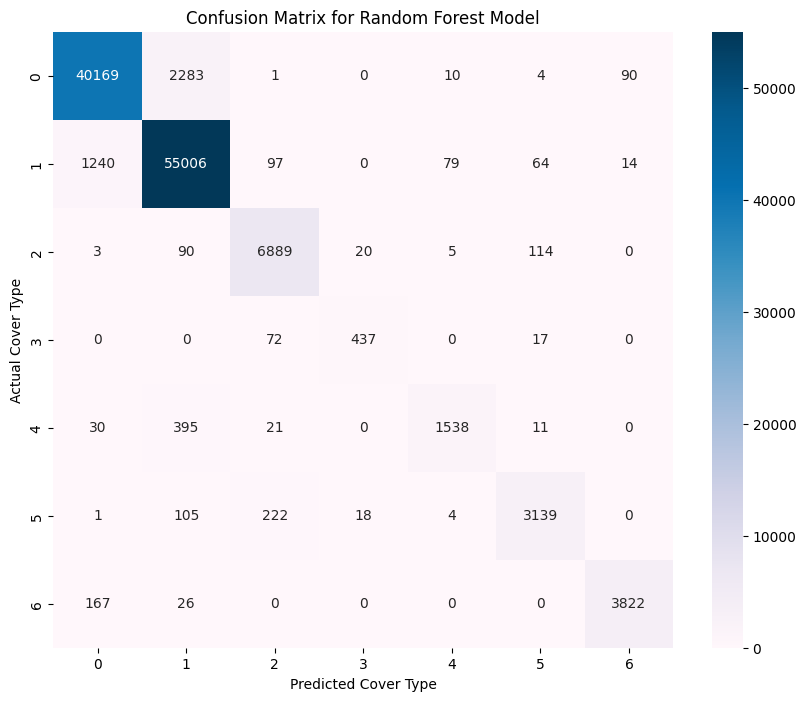

In [75]:
rfcm = confusion_matrix(y_test, rfy_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(rfcm, annot=True, fmt='d', cmap='PuBu')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Cover Type')
plt.ylabel('Actual Cover Type')
plt.show()

In [81]:
# GradientBoostingClassifier
gbmodel = GradientBoostingClassifier()
gbmodel.fit(x_train, y_train)

GradientBoostingClassifier()

In [82]:
gby_pred = gbmodel.predict(x_test)

gbaccuracy = accuracy_score(y_test, gby_pred)
print(f'Accuracy: {gbaccuracy}')

Accuracy: 0.7728716126089687


In [83]:
gbreport = classification_report(y_test, gby_pred)
print(gbreport)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     42557
           1       0.78      0.83      0.80     56500
           2       0.77      0.83      0.80      7121
           3       0.77      0.73      0.75       526
           4       0.75      0.24      0.37      1995
           5       0.66      0.48      0.56      3489
           6       0.86      0.69      0.77      4015

    accuracy                           0.77    116203
   macro avg       0.76      0.65      0.68    116203
weighted avg       0.77      0.77      0.77    116203



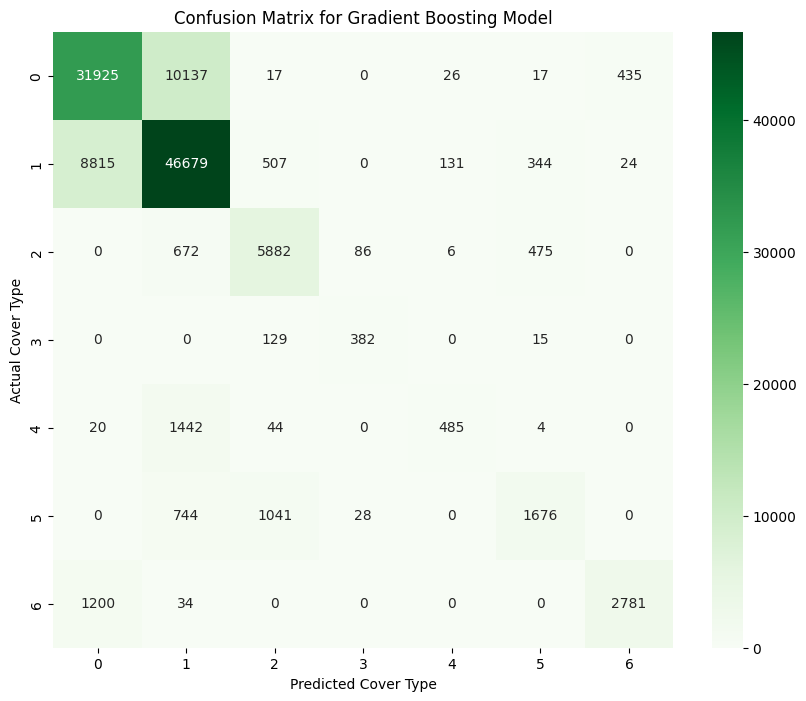

In [84]:
gbcm = confusion_matrix(y_test, gby_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(gbcm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.xlabel('Predicted Cover Type')
plt.ylabel('Actual Cover Type')
plt.show()

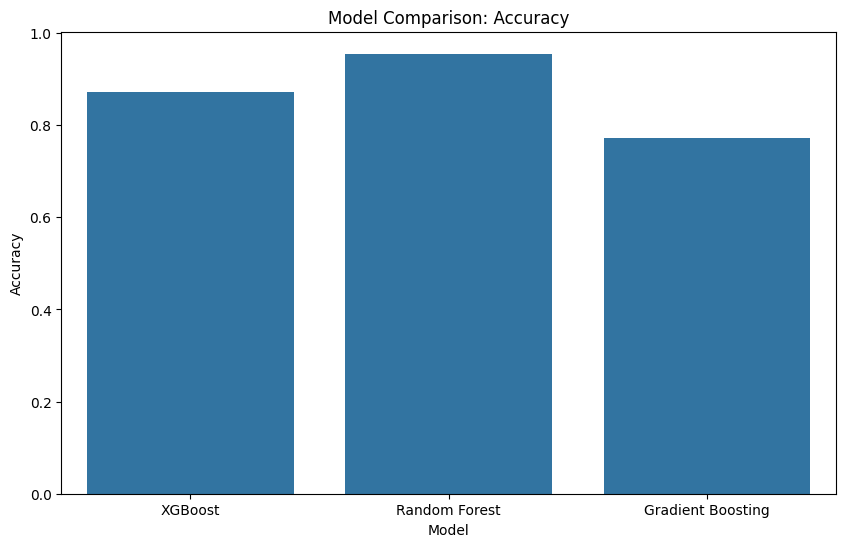

In [89]:
# comparing
models = ['XGBoost', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy, rfaccuracy, gbaccuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison: Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()